# THE SPARKS FOUNDATION

# Data Science & Business Analytics Internship GRIP Feb 2021

# Author : Udita Goswami

# Task - 6 : Prediction using Decision Tree Algorithm

In [ ]:
Objective : Create the Decision Tree classifier and visualize it graphically.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import pickle
from sklearn import tree
from six import StringIO
from sklearn.tree import export_graphviz     # this is for export graphviz 
from sklearn import metrics 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image 
sns.set()
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import pydotplus
from io import StringIO
import os     
os.environ["PATH"] += os.pathsep + r'C:\Users\NAVJOT\anaconda3\pkgs\graphviz-2.38-hfd603c8_2\Library\bin\graphviz'      #the path to Graphiz files


In [17]:
iris = load_iris()
iris
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

## here our targets are the  three classes of iris plants: 'setosa', 'versicolor' and 'virginica'. 

In [27]:
feature_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)', 'petal width (cm)']#,'Categories']

- Now that we have extracted the data attributes and corresponding labels, we will split them to train and test datasets from the variable X and y.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [29]:
ID = pd.DataFrame(range(1, len(y_test) + 1 ,1))
#Preview the data
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier()

In [31]:
# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)

- When we initiate the Decision Tree Classifier, by-default the criterion parameters is set to ‘gini’, and there are various other parameters as well, which we can go with the default or change it if required. Will see what impact of it when change one or two parameters.

In [36]:
#Predict the response for test dataset
y_pred = classifier.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [33]:
#evaluate accuracy
eval_model=metrics.accuracy_score(y_test, y_pred)

print("Accuracy: ",eval_model)

Accuracy:  0.9777777777777777


- From the score it seems using Gini as Criterion we found the Accuracy on Train Data as 100 which is represented as 1.0.

- And on Test Data it is ~97% which is represented by ~ 0.97

In [34]:
# showing the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

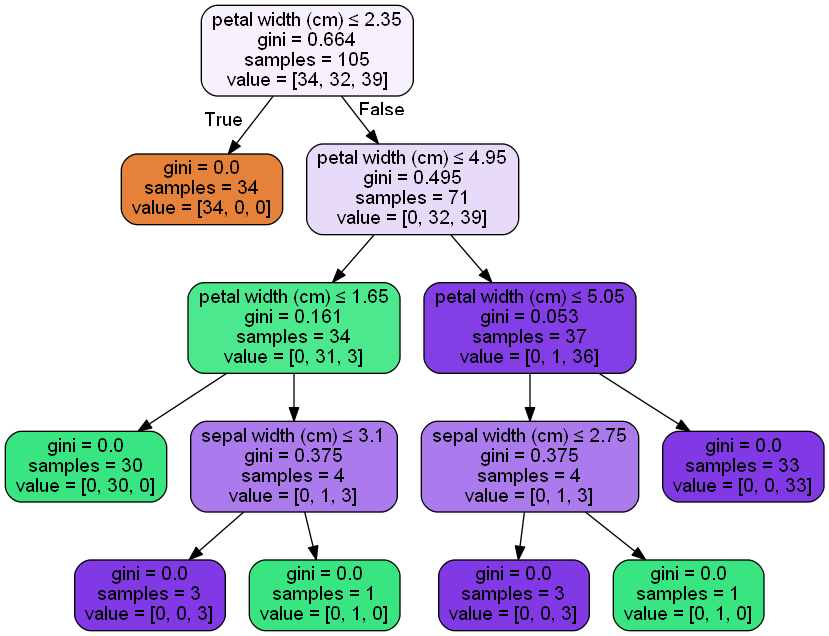

In [35]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

# creating an Image
Image(graph.create_png())

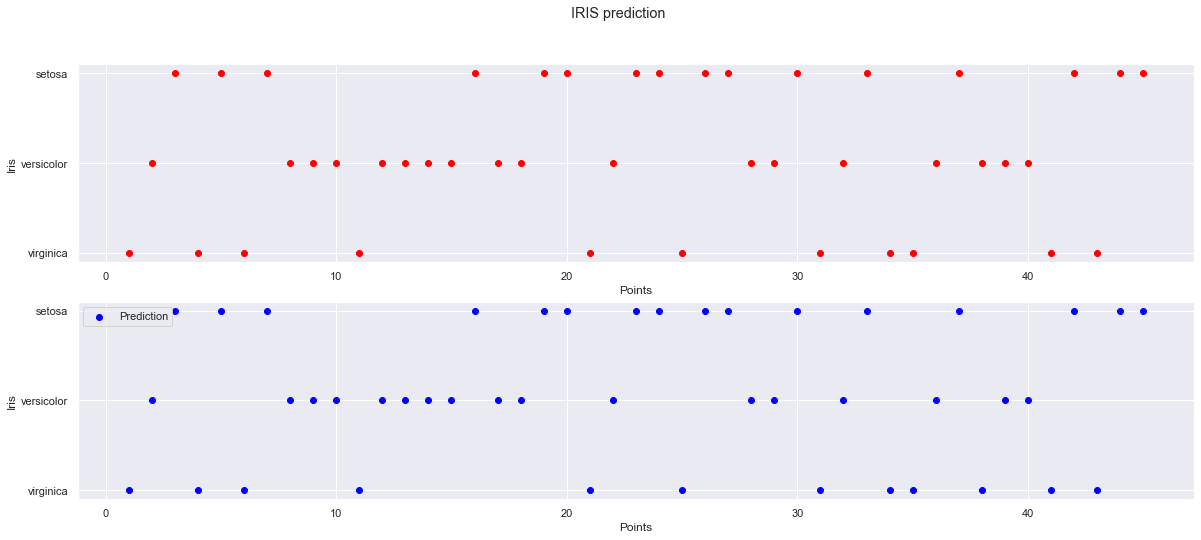

In [12]:
plt.rcParams["figure.figsize"] = (20,8)

fig,axs = plt.subplots(2)
fig.suptitle('IR+IS prediction')


axs[0].scatter(ID, y_test,color = 'red', label="Actual")
axs[1].scatter(ID,y_pred, color='blue', label="Prediction")

for ax in axs.flat:
    ax.set(xlabel='Points', ylabel='Iris')

plt.legend()
plt.show()

- Here we have plot the data, the Red colour ploted data is the Actual Data
- and the blue colour ploted data is the predicted data

## **Thank You**